# RECTANGLE DETECTION

https://github.com/luczeng/HoughRectangle

https://stackoverflow.com/questions/1194352/proportions-of-a-perspective-deformed-rectangle

https://github.com/bsdnoobz/opencv-code/blob/master/quad-segmentation.cpp

https://www.google.com/search?channel=fs&client=ubuntu&q=automatic+perspective+correction+quadrilateral+objects

https://www.google.com/search?channel=fs&client=ubuntu&q=automatic-perspective-correction-for-quadrilateral-objects

https://what-i-learns-today.blogspot.com/2014/11/automatic-prospective-correction-using.html


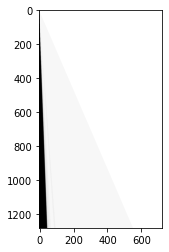

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
dodraw=0
drawsel=1
contcolor=(255,0,0)
conthick=10

image=cv2.imread('../zimages/perspective1.jpg')
image2=image.copy()
filterparam=(100,20,0)
edges=cv2.Canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),filterparam[0], filterparam[1], filterparam[2])
cnts= cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
if dodraw:
    cv2.drawContours(image,cnts, -1, contcolor, conthick)
    
out_cnts=[]
aprx_poly=[]
warp_cnts=[]
cnts_persp=[]
for c in cnts:
    peri = cv2.arcLength(c, True)
    poly = cv2.approxPolyDP(c, 0.01 * peri, True)
    if len(poly) == 4: #and cv2.contourArea(cnt) > 400:
        out_cnts.append(c)
        aprx_poly.append(poly)
        if drawsel:
            cv2.drawContours(image2,c, -1, contcolor, conthick)
        extrema = np.array([poly[0][0], poly[1][0], poly[2][0], poly[3][0]])
        rect = np.zeros((4, 2), dtype = "float32")
        s = extrema.sum(axis = 1)
        rect[0] = extrema[np.argmin(s)]
        rect[2] = extrema[np.argmax(s)]
        diff = np.diff(extrema, axis = 1)
        rect[1] = extrema[np.argmin(diff)]
        rect[3] = extrema[np.argmax(diff)]

        (tl, tr, br, bl) = rect
        widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
        widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
        maxWidth = max(int(widthA), int(widthB))
        heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
        heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
        maxHeight = max(int(heightA), int(heightB))
        dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
   
        M = cv2.getPerspectiveTransform(rect, dst)
        warped = cv2.warpPerspective(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), M, (maxWidth, maxHeight))
        warp_cnts.append(warped)
        cnts_persp.append(M)
        
        
plt.imshow(warped,cmap='gray')
plt.show()

    


#HU moments for rectangle detection